In [16]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [17]:
df["Result"].value_counts()

Result
1    81
0    72
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11248\3383097412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette=colors)


<Axes: xlabel='Result', ylabel='count'>

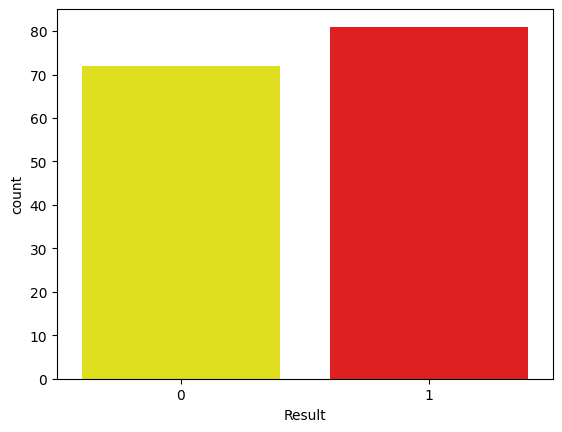

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["yellow", "red"]
sns.countplot(x='Result', data=df, palette=colors)
# 불균형 데이터셋

In [19]:
cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

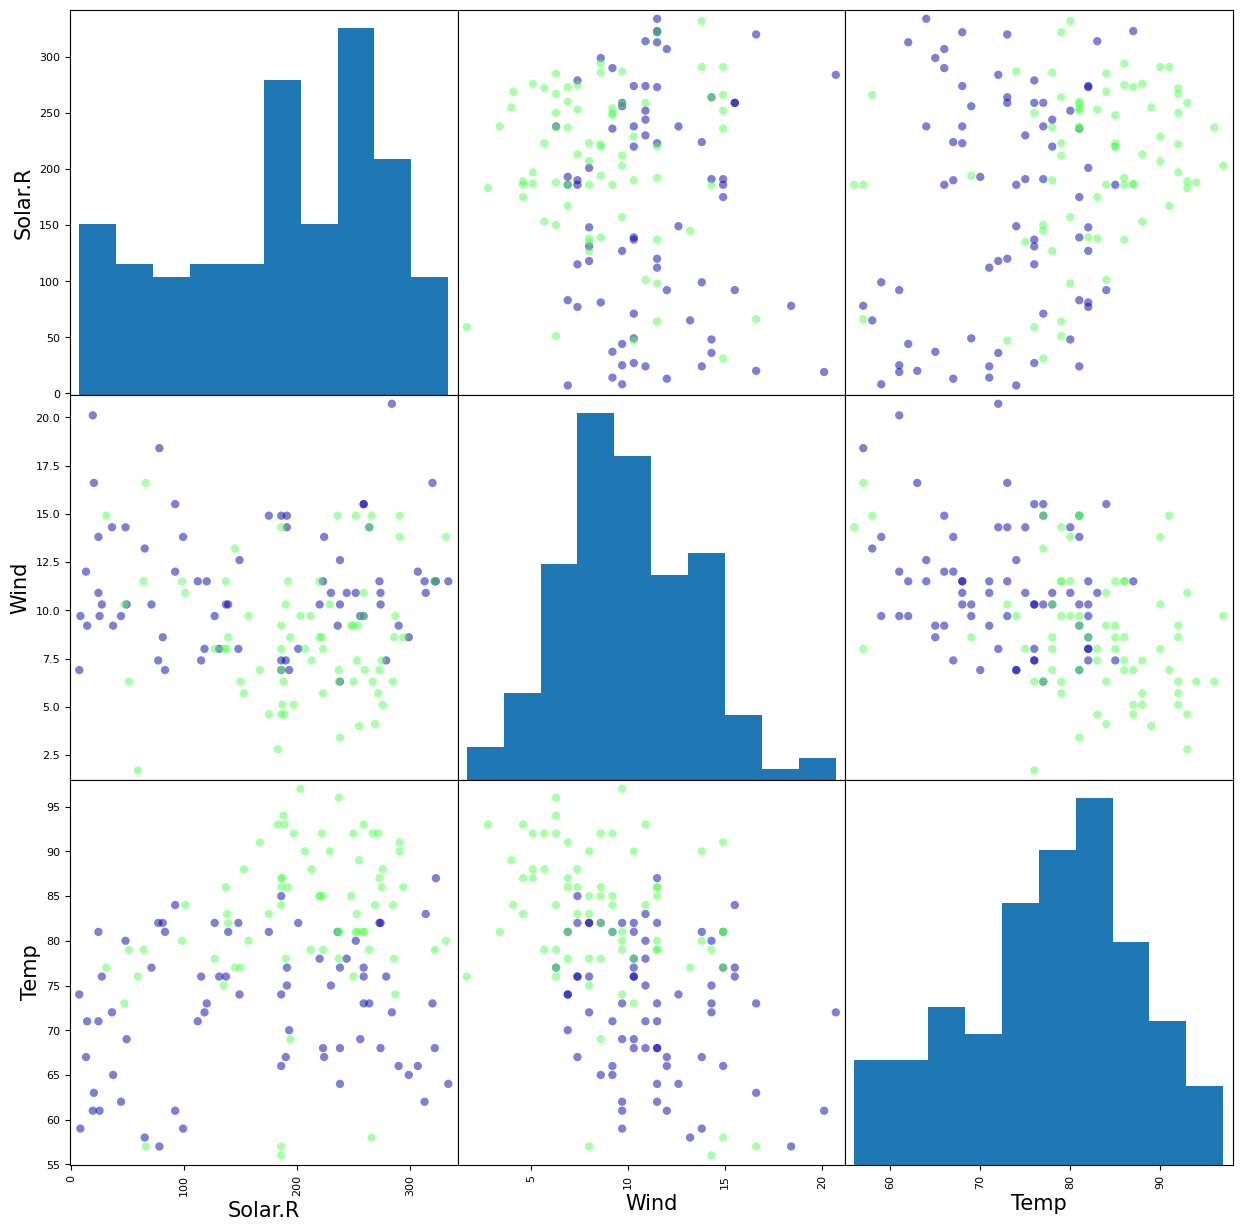

In [29]:
import mglearn
# 산점도 행렬출력
# 자기자신과 만났을 때는 산점도가 아닌 히스토그램을 보여줌
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)
plt.show()

In [21]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp.Result.value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [22]:
X = X_samp[cols]
y = y_samp['Result']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 학습용
train_rate = []
# 검증용
test_rate = []

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용
neighbors = range(1, 11)

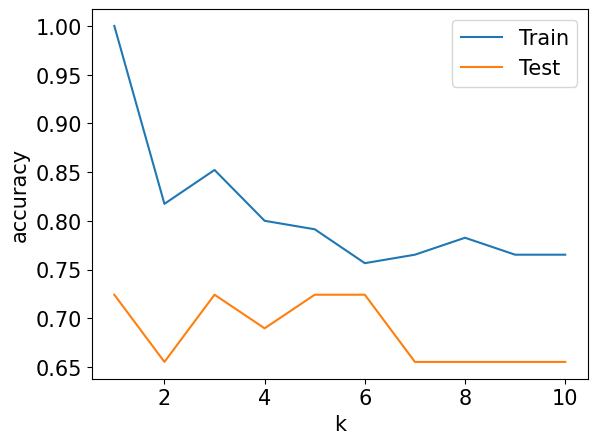

In [25]:
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train, y_train))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test, y_test))

plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="Train")
plt.plot(neighbors, test_rate, label="Test")
plt.ylabel("accuracy")
plt.xlabel("k")
plt.legend()

In [26]:
import numpy as np
max_rate = max(test_rate)
idx = np.argmax(test_rate)
print('최적의 k : ', idx+1)
# 학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다

최적의 k :  1


In [31]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred=model.predict(X_test)
print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.7913043478260869
검증용 :  0.7241379310344828


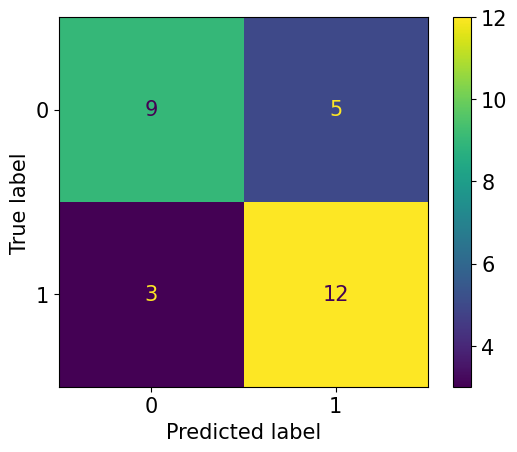

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred), display_labels=model.classes_).plot()